# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [3]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



ModuleNotFoundError: No module named 'google'

In [4]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils


'cp' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

In [139]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


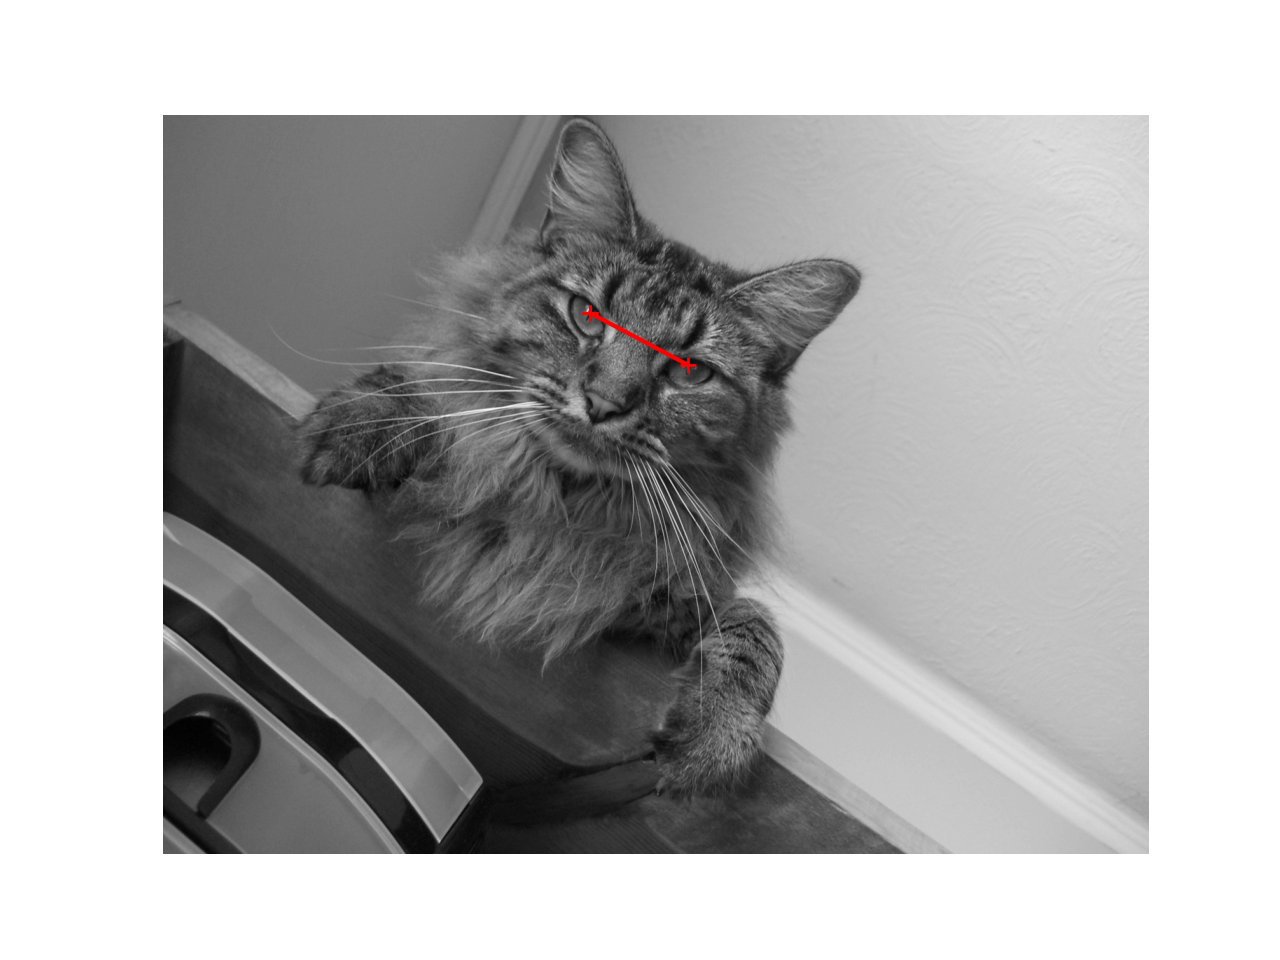

In [140]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

In [141]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

<IPython.core.display.Javascript object>

In [142]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [143]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


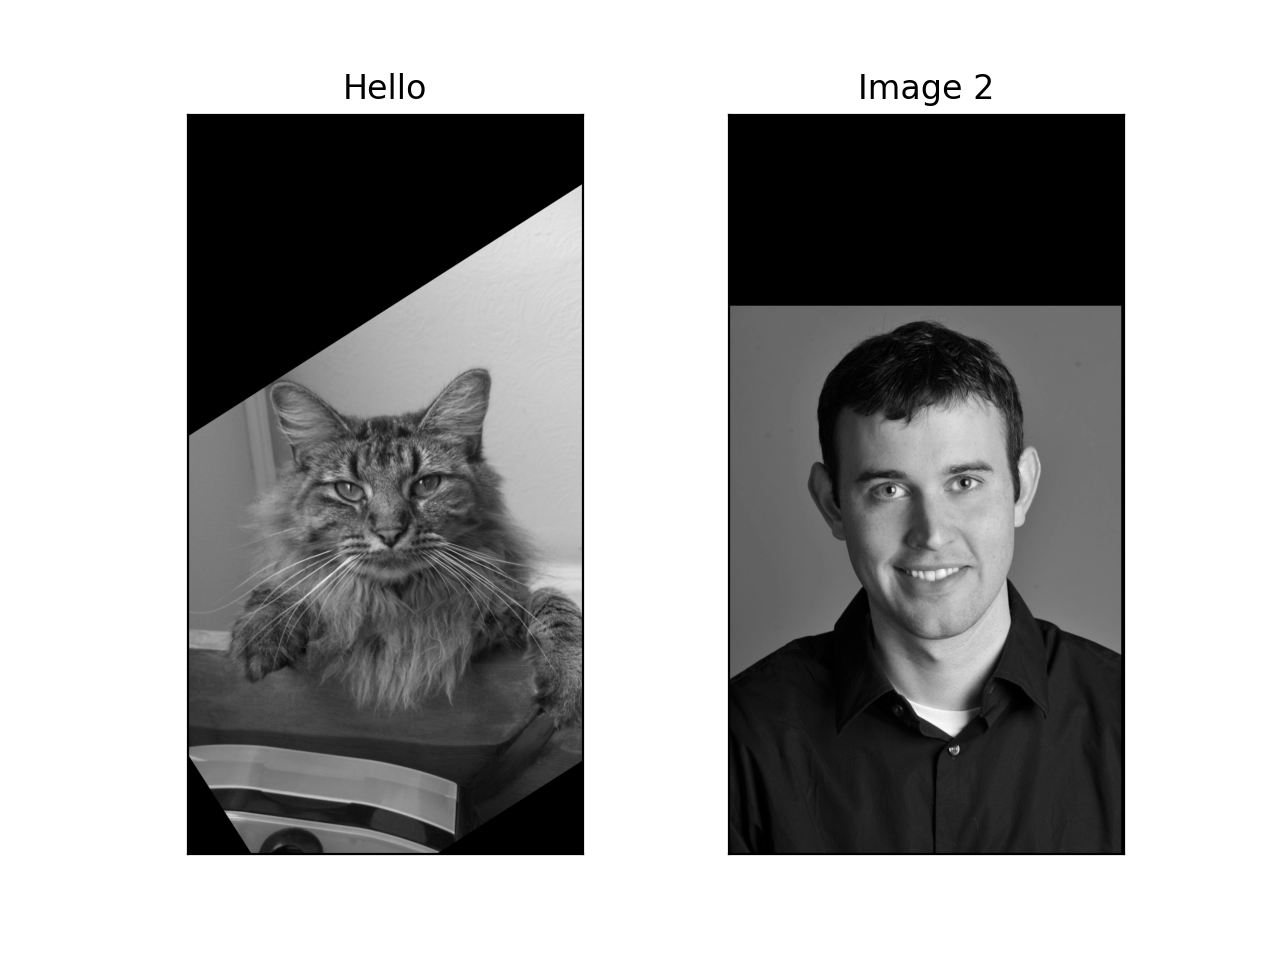

In [144]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [145]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    hiKernImg = im2
    lowKern = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    hiKern = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    im1Filt = cv2.filter2D(src=im1, ddepth=-1, kernel=lowKern)
    im2Filt = im2 - cv2.filter2D(src=im2, ddepth=-1, kernel=hiKern)
    return im1Filt + im2Filt

    

In [205]:
# MY CODE: TEST IMAGES
def showImg(*argv):
    if len(argv) == 1:
        fig = plt.figure()
        plt.imshow(argv[0], cmap='gray')
        plt.axis('off')
    else:
        fig, axes = plt.subplots(1, len(argv))
        for i in range(len(argv)):
            axes[i].imshow(argv[i], cmap='gray')
            axes[i].set_title('Image ' + str(i)), axes[i].set_xticks([]), axes[i].set_yticks([])
        return axes
def label(axes, *argv):
    for i in range(len(argv)):
        axes[i].set_title(argv[i])
    
    
    

In [203]:
# MY CODE: SIGMA TEST
def imgTester():
    lowSigs = [20, 15, 10, 5, 0]
    hiSigs = [20, 25, 30, 35, 40]
    fig, axes = plt.subplots(1, len(lowSigs))
    for i in range(len(lowSigs)):
        sigma_low = lowSigs[i]
        sigma_high = hiSigs[i]
        im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)
        axes[i].imshow(im_hybrid,cmap='gray')
imgTester()

<IPython.core.display.Javascript object>

In [206]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)

mySigLow = 15
mySigHigh = 25
im_hybrid = hybridImage(im2, im1, mySigLow, mySigHigh)
showImg(im_hybrid)

<IPython.core.display.Javascript object>

In [207]:
# MY CODE: Fourier 
im1Fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1))))
im2Fourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2))))
hybridFourier = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid))))
fourierAxes = showImg(im1Fourier, im2Fourier, hybridFourier)
label(fourierAxes, "im1", "im2", "hybrid")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


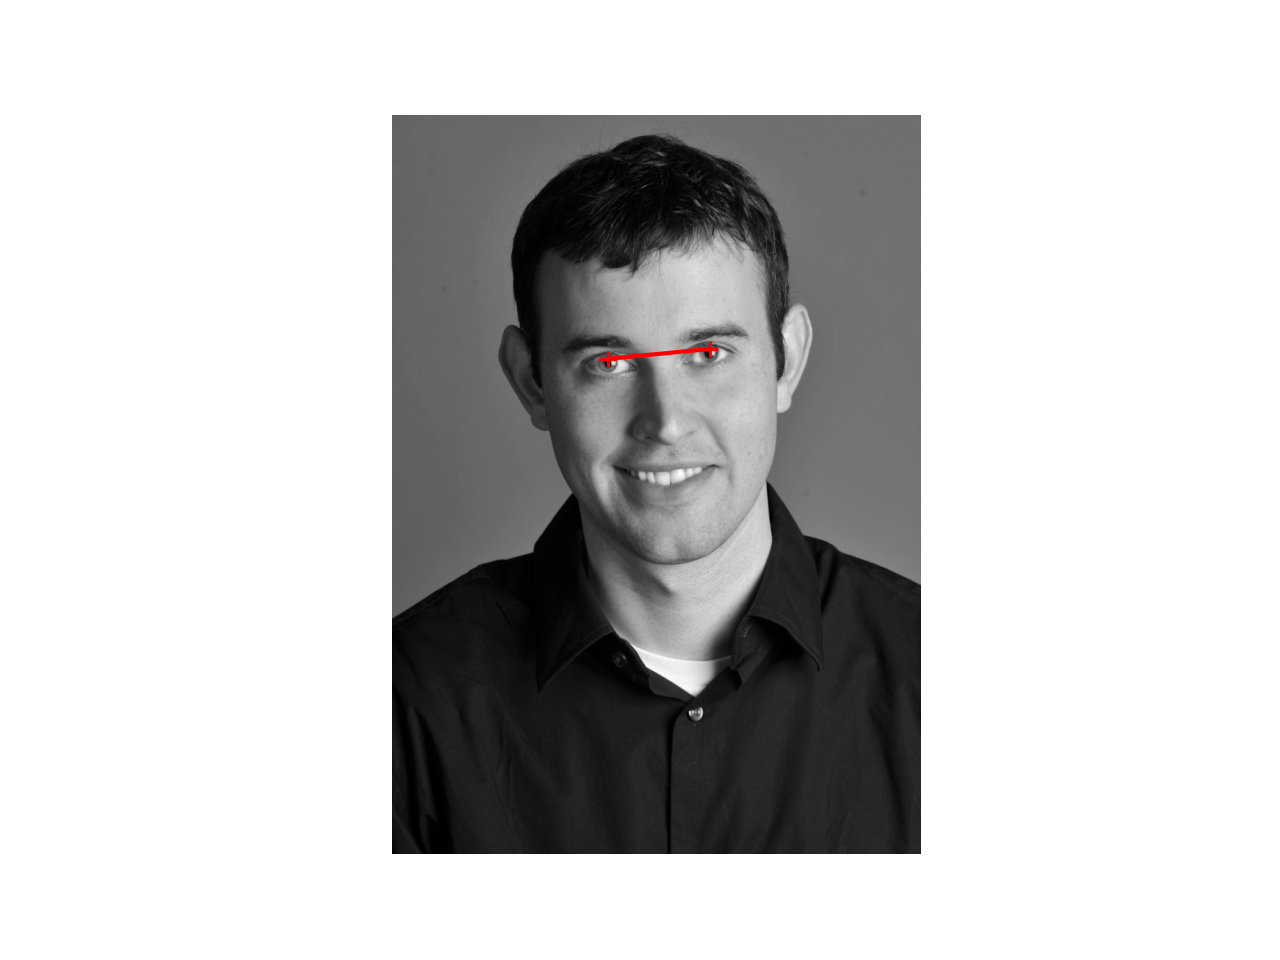

In [11]:
# MY CODE: MY IMAGES
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

%matplotlib notebook  
import matplotlib.pyplot as plt

lowIm_file = 'nutmeg.jpg'
hiIm_file = 'DerekPicture.jpg'

lowIm = np.float32(cv2.imread(lowIm_file, cv2.IMREAD_GRAYSCALE) / 255.0)
hiIm = np.float32(cv2.imread(hiIm_file, cv2.IMREAD_GRAYSCALE) / 255.0)

pts_im1 = utils.prompt_eye_selection(lowIm)

pts_im2 = utils.prompt_eye_selection(hiIm)


In [12]:
lowIm, hiIm = utils.align_images(lowIm_file, hiIm_file,pts_im1,pts_im2,save_images=False)

# convert to grayscale
lowIm = cv2.cvtColor(lowIm, cv2.COLOR_BGR2GRAY) / 255.0
hiIm = cv2.cvtColor(hiIm, cv2.COLOR_BGR2GRAY) / 255.0

#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(lowIm,cmap='gray')
axes[0].set_title('Low Img'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hiIm,cmap='gray')
axes[1].set_title('Hi Img'), axes[1].set_xticks([]), axes[1].set_yticks([]);

<IPython.core.display.Javascript object>

In [13]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    hiKernImg = im2
    lowKern = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    hiKern = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    im1Filt = cv2.filter2D(src=im1, ddepth=-1, kernel=lowKern)
    im2Filt = im2 - cv2.filter2D(src=im2, ddepth=-1, kernel=hiKern)
    return im1Filt + im2Filt

# MY CODE: TEST IMAGES
def showImg(*argv):
    if len(argv) == 1:
        fig = plt.figure()
        plt.imshow(argv[0], cmap='gray')
        plt.axis('off')
    else:
        fig, axes = plt.subplots(1, len(argv))
        for i in range(len(argv)):
            axes[i].imshow(argv[i], cmap='gray')
            axes[i].set_title('Image ' + str(i)), axes[i].set_xticks([]), axes[i].set_yticks([])
        return axes
def label(axes, *argv):
    for i in range(len(argv)):
        axes[i].set_title(argv[i])

<IPython.core.display.Javascript object>


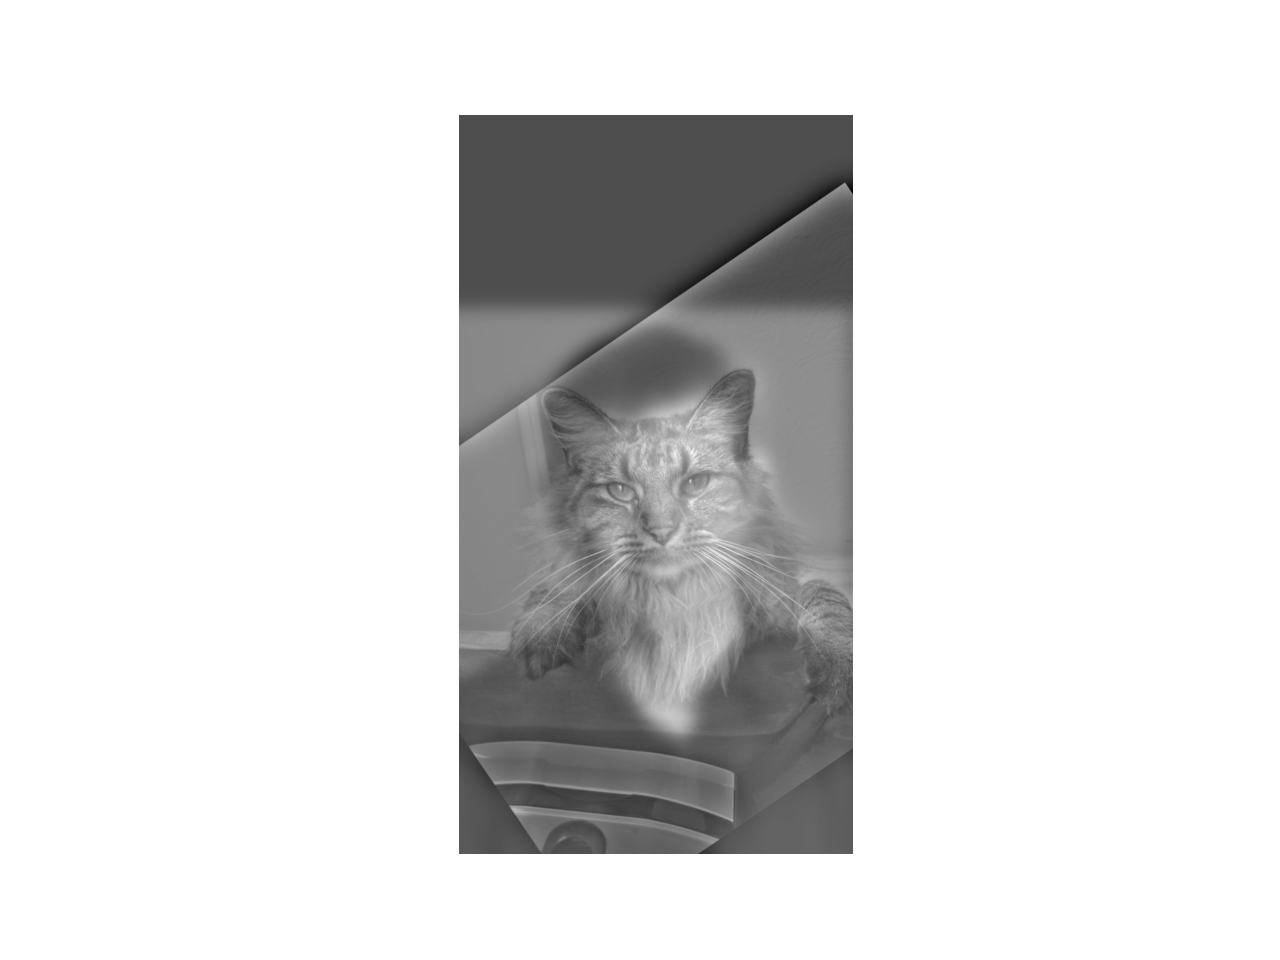

In [16]:
mySigLow = 15
mySigHigh = 25
im_hybrid = hybridImage(hiIm, lowIm, mySigLow, mySigHigh)
showImg(im_hybrid)

In [ ]:




# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift